<a href="https://colab.research.google.com/github/AnshT013/Machine_Learning_initial_Practice/blob/main/Spam_Email_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Basic data handling
import pandas as pd
import numpy as np

# Text preprocessing
import re
import string

# Machine learning tools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


## 🧪 Step 1: Import Required Libraries – Explanation

| **Library** | **Purpose** |
|-------------|-------------|
| `pandas`, `numpy` | For data handling and basic numerical operations. We'll use pandas to load and explore the dataset. |
| `re`, `string` | For text preprocessing – cleaning messages by removing unwanted characters and punctuation. |
| `train_test_split` | To divide the dataset into training and test sets (so we can evaluate model performance). |
| `TfidfVectorizer` | Converts text into numeric format, taking into account how important a word is (TF-IDF = Term Frequency-Inverse Document Frequency). |
| `MultinomialNB` | Naive Bayes algorithm best suited for text classification problems like spam detection. |
| `accuracy_score`, `classification_report` | For measuring how good our model is. |
| `confusion_matrix`, `ConfusionMatrixDisplay` | Helps us visualize prediction results and understand where the model made mistakes. |


In [2]:
import pandas as pd

# Load the uploaded CSV file (it should be in the same directory as the notebook)
data = pd.read_csv('spam.csv', encoding='latin-1')

# Display the first few rows
data.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## 📥 Step 2: Load the Dataset – Explanation

### ✅ What We’re Doing:
Since we uploaded the dataset directly into the Colab working directory, we don’t need to mount Google Drive.

We use `pandas` to load and display the dataset.

### 📌 Code Walkthrough:

- `pd.read_csv('spam.csv', encoding='latin-1')`  
  Loads the uploaded CSV file. We specify `'latin-1'` encoding to avoid decoding issues due to special characters.

- `data.head()`  
  Displays the first 5 rows of the dataset so we can see the structure.


In [6]:
import re
import string

# Use only the first two relevant columns and make a clean copy
data = data.iloc[:, :2].copy()
data.columns = ['label', 'message']

# Convert labels: ham -> 0, spam -> 1
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()

# Apply text cleaning
data['cleaned_message'] = data['message'].apply(clean_text)

# Show some cleaned messages
data[['message', 'cleaned_message']].head()




,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final ...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
tfidf = TfidfVectorizer(max_features=3000)  # Limit to top 3000 important words

# Fit and transform the cleaned messages
X = tfidf.fit_transform(data['cleaned_message']).toarray()

# Store labels separately
y = data['label']

# Show the shape of final feature matrix
print("Feature matrix shape:", X.shape)


Feature matrix shape: (5572, 3000)


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

## 🧠 Step 5: Train-Test Split & Naive Bayes Model – Explanation

### ⚙️ 1. Splitting Data
We use `train_test_split()` to divide our data into:
- `X_train` and `y_train`: used to train the model.
- `X_test` and `y_test`: used to evaluate how well the model performs on unseen data.

We keep 20% of the data for testing using `test_size=0.2`.

### ⚙️ 2. Why Multinomial Naive Bayes?
- It's a **probabilistic algorithm** that works well for **discrete features** like word counts or TF-IDF.
- Commonly used in spam filtering, sentiment analysis, and document classification.

### ⚙️ 3. Model Training
- We initialize the model using `MultinomialNB()`.
- Then we train it on our training data using `.fit(X_train, y_train)`.

Once trained, the model can now predict whether a message is spam or not based on learned word patterns!


Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       1.00      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.99      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



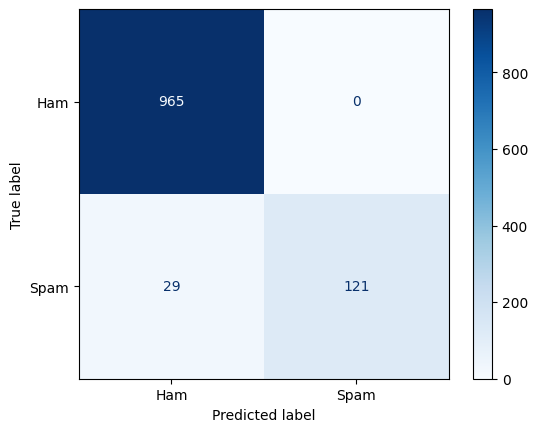

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = model.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Ham", "Spam"])
disp.plot(cmap='Blues')


In [10]:
# Function to clean and transform input text
def predict_message(msg):
    # Clean the message using same steps as before
    msg_clean = re.sub('[^a-zA-Z]', ' ', msg)
    msg_clean = msg_clean.lower()
    msg_clean = msg_clean.split()
    msg_clean = ' '.join(msg_clean)

    # Vectorize using the same TF-IDF
    vectorized = tfidf.transform([msg_clean]).toarray()

    # Predict
    prediction = model.predict(vectorized)[0]
    return "Spam" if prediction == 1 else "Ham"

# Try with some test messages
samples = [
    "Congratulations! You have won a free ticket to Bahamas. Call now!",
    "Hey, are we still meeting for lunch today?",
    "URGENT! Your mobile number has won $5000. Reply WIN to claim.",
    "Made me realize that a man can do better in life"
]

# Print predictions
for msg in samples:
    print(f"Message: {msg}\nPrediction: {predict_message(msg)}\n")


Message: Congratulations! You have won a free ticket to Bahamas. Call now!
Prediction: Spam

Message: Hey, are we still meeting for lunch today?
Prediction: Ham

Message: URGENT! Your mobile number has won $5000. Reply WIN to claim.
Prediction: Spam

Message: Made me realize that a man can do better in life
Prediction: Ham

